In [1]:
using StatPlots

In [4]:
using DataFrames, IndexedTables

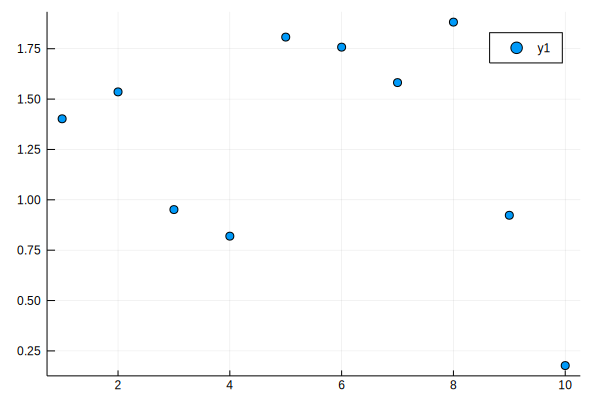

In [5]:
# Could get a datasource from RDatasets
# Look at previous code

df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10))

@df df plot(:a, [:b :c], colour = [:red :blue])
@df df scatter(:a, :b, markersize = 4 .* log.(:c .+ 0.1))

t = table(1:10, rand(10), names = [:a, :b]) # IndexedTable
@df t scatter(2 .* :b)

---

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1192


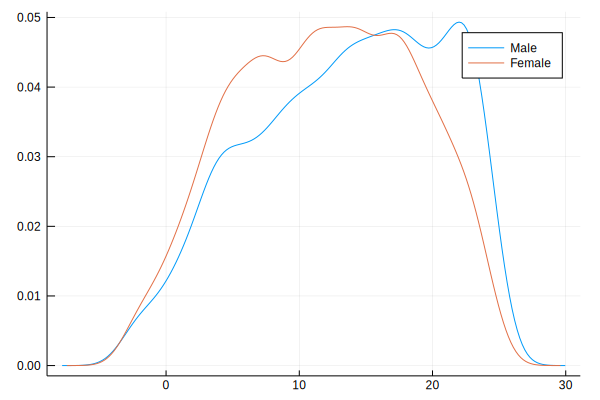

In [6]:
using RDatasets
school = RDatasets.dataset("mlmRev","Hsb82")
@df school density(:MAch, group = :Sx)

---

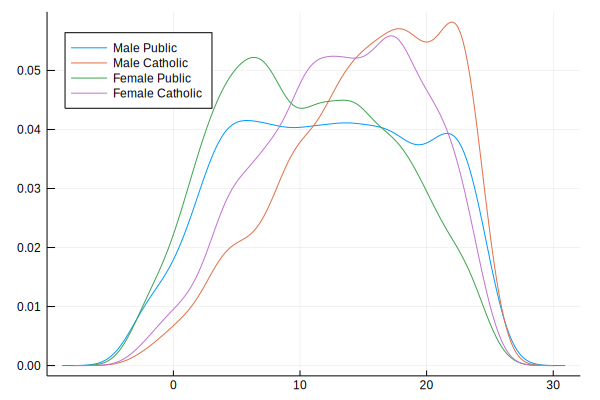

In [9]:
using Query, StatPlots
df |> @filter(_.a > 5) |> @map({_.b, d = _.c-10}) |> @df scatter(:b, :d)

school = RDatasets.dataset("mlmRev","Hsb82")

## @df school density(:MAch, group = :Sx)

@df school density(:MAch, group = (:Sx, :Sector), legend = :topleft)

---

In [10]:
import RDatasets
iris = RDatasets.dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [14]:
## using Blink, Interact

In [15]:
## w = Window()
## body!(w, dataviewer(iris))

---

In [18]:
using Compat
using MeshCat
using CoordinateTransformations
import GeometryTypes: HyperRectangle, Vec, Point, HomogenousMesh, SignedDistanceField
import ColorTypes: RGBA, RGB

In [22]:
# Create a new visualizer instance
vis = Visualizer()
IJuliaCell(vis)


Scope("scope-ebbc277a-d011-4e39-810e-81076a9a5e51", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/2fc57ce5e057607db2cbaa8bbaf7df0450aad064-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/5ccc4137066ced2e4999574338f6e9f21de1f053-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-5b471468-2f27-46d5-bb67-db7f433773c6&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-5b471468-2f27-46d5-bb67-db7f433773c6&quot;,&quot;id&quot;:&quot;ob_68&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_67&quot;,&quot;value&quot;:[]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_69&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_68&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quot;:{&quot;left&quot;:0,&quot;right&quot;:0,&quot;overflow&quot;:&quot;hidden&quot;,&quot;position&quot;:&quot;absolute&quot;,&quot;height&quot;:&quot;100vh&quot;,&quot;margin&quot;:0,&quot;width&quot;:&quot;100vw&quot;}},&quot;nodeType&quot;:&quot;DOM&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;namespace&quot;:&quot;html&quot;,&quot;tag&quot;:&quot;div&quot;},&quot;children&quot;:[]}]})</unsafe-script>\" + \"</body></html>\";\n        setTimeout(function () { resizeIframe() }, 0)\n    }\n\n    doc.body.appendChild(webio)\n}"), JSString("(function (){return this.dom.s

In [24]:
box = HyperRectangle(Vec(0.,0,0), Vec(1.,1,1))
setobject!(vis, box)
settransform!(vis, LinearMap(AngleAxis(pi/4, 0, 0, 1)))

MeshCat Visualizer with path /meshcat

In [25]:
delete!(vis)

MeshCat Visualizer with path /meshcat

Unexpected end of input
 ...when parsing byte with value '0'
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] _error(::String, ::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/malcolm/.julia/packages/JSON/ebvl3/src/Parser.jl:150
 [3] byteat(::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/malcolm/.julia/packages/JSON/ebvl3/src/Parser.jl:59
 [4] chomp_space! at /Users/malcolm/.julia/packages/JSON/ebvl3/src/Parser.jl:72 [inlined]
 [5] parse_value(::JSON.Parser.ParserContext{Dict{String,Any},Int64}, ::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/malcolm/.julia/packages/JSON/ebvl3/src/Parser.jl:160
 [6] #parse#2 at /Users/malcolm/.julia/packages/JSON/ebvl3/src/Parser.jl:427 [inlined]
 [7] parse at /Users/malcolm/.julia/packages/JSON/ebvl3/src/Parser.jl:425 [inlined]
 [8] macro expansion at /Users/malcolm/.julia/packages/Lazy/ZAeCx/src/macros.jl:256 [inlined]
 [9] macro expansion at /Users/malcolm/.julia/packages/Blink/6QR5U/src/AtomSh

In [ ]:
#=
using MeshIO
using FileIO
setobject!(vis, cat_mesh)
settransform!(vis, LinearMap(AngleAxis(pi/2, 1, 0, 0)))
=#